## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  55.484130  1424.637064  0.514117  10.216351  734.599141
1  58.061671   764.973216  0.235239   7.170439  189.243954
2  80.178059   380.221122  0.078358   2.899611   85.577946
3  22.529568  1487.816939  0.125765   9.082606  188.434696
4  47.276666  1456.417375  0.386328   9.483744  564.680731


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0268841	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0158370	total: 58.4ms	remaining: 29.2s
2:	learn: 1.0061951	total: 59ms	remaining: 19.6s
3:	learn: 0.9931408	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9772787	total: 60ms	remaining: 11.9s
5:	learn: 0.9654245	total: 60.5ms	remaining: 10s
6:	learn: 0.9547435	total: 61.2ms	remaining: 8.69s
7:	learn: 0.9420054	total: 61.7ms	remaining: 7.66s
8:	learn: 0.9312055	total: 62.3ms	remaining: 6.86s
9:	learn: 0.9189047	total: 63ms	remaining: 6.24s
10:	learn: 0.9087227	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8962731	total: 64ms	remaining: 5.27s
12:	learn: 0.8825770	total: 64.5ms	remaining: 4.89s
13:	learn: 0.8701563	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8608304	total: 65.4ms	remaining: 4.29s
15:	learn: 0.8520733	total: 66ms	remaining: 4.06s
16:	learn: 0.8412333	total: 66.6ms	remaining: 3.85s
17:	learn: 0.8316033	total: 67.2ms	remaining: 3.67s
18:	learn: 0.8231929	total: 67.7ms	remaining: 3.5s
19:	l

98:	learn: 0.3205071	total: 106ms	remaining: 962ms
99:	learn: 0.3169991	total: 106ms	remaining: 955ms
100:	learn: 0.3136000	total: 107ms	remaining: 949ms
101:	learn: 0.3106908	total: 107ms	remaining: 943ms
102:	learn: 0.3076940	total: 108ms	remaining: 938ms
103:	learn: 0.3043786	total: 108ms	remaining: 932ms
104:	learn: 0.3008346	total: 109ms	remaining: 927ms
105:	learn: 0.2976193	total: 109ms	remaining: 921ms
106:	learn: 0.2939780	total: 110ms	remaining: 916ms
107:	learn: 0.2905248	total: 110ms	remaining: 910ms
108:	learn: 0.2879240	total: 111ms	remaining: 904ms
109:	learn: 0.2846948	total: 111ms	remaining: 899ms
110:	learn: 0.2814013	total: 112ms	remaining: 894ms
111:	learn: 0.2783205	total: 112ms	remaining: 889ms
112:	learn: 0.2755463	total: 113ms	remaining: 884ms
113:	learn: 0.2728351	total: 113ms	remaining: 879ms
114:	learn: 0.2700205	total: 114ms	remaining: 875ms
115:	learn: 0.2669361	total: 114ms	remaining: 870ms
116:	learn: 0.2641407	total: 115ms	remaining: 865ms
117:	learn: 0.

262:	learn: 0.0798751	total: 186ms	remaining: 521ms
263:	learn: 0.0794413	total: 187ms	remaining: 520ms
264:	learn: 0.0790651	total: 188ms	remaining: 521ms
265:	learn: 0.0786621	total: 188ms	remaining: 519ms
266:	learn: 0.0780000	total: 189ms	remaining: 518ms
267:	learn: 0.0775263	total: 189ms	remaining: 517ms
268:	learn: 0.0770887	total: 190ms	remaining: 515ms
269:	learn: 0.0767803	total: 190ms	remaining: 513ms
270:	learn: 0.0764229	total: 190ms	remaining: 512ms
271:	learn: 0.0760942	total: 191ms	remaining: 511ms
272:	learn: 0.0757153	total: 191ms	remaining: 510ms
273:	learn: 0.0753127	total: 192ms	remaining: 509ms
274:	learn: 0.0749128	total: 192ms	remaining: 507ms
275:	learn: 0.0743536	total: 193ms	remaining: 506ms
276:	learn: 0.0738148	total: 193ms	remaining: 505ms
277:	learn: 0.0732025	total: 194ms	remaining: 504ms
278:	learn: 0.0728167	total: 194ms	remaining: 502ms
279:	learn: 0.0724031	total: 195ms	remaining: 501ms
280:	learn: 0.0720039	total: 195ms	remaining: 500ms
281:	learn: 

473:	learn: 0.0301050	total: 288ms	remaining: 320ms
474:	learn: 0.0299996	total: 289ms	remaining: 319ms
475:	learn: 0.0299357	total: 289ms	remaining: 318ms
476:	learn: 0.0298727	total: 290ms	remaining: 318ms
477:	learn: 0.0297109	total: 290ms	remaining: 317ms
478:	learn: 0.0296089	total: 291ms	remaining: 316ms
479:	learn: 0.0295091	total: 291ms	remaining: 316ms
480:	learn: 0.0294484	total: 292ms	remaining: 315ms
481:	learn: 0.0293346	total: 292ms	remaining: 314ms
482:	learn: 0.0291784	total: 293ms	remaining: 313ms
483:	learn: 0.0290819	total: 293ms	remaining: 313ms
484:	learn: 0.0289727	total: 294ms	remaining: 312ms
485:	learn: 0.0289318	total: 294ms	remaining: 311ms
486:	learn: 0.0288071	total: 295ms	remaining: 310ms
487:	learn: 0.0287427	total: 295ms	remaining: 310ms
488:	learn: 0.0286500	total: 296ms	remaining: 309ms
489:	learn: 0.0285512	total: 296ms	remaining: 308ms
490:	learn: 0.0284543	total: 297ms	remaining: 307ms
491:	learn: 0.0283917	total: 297ms	remaining: 307ms
492:	learn: 

640:	learn: 0.0167856	total: 369ms	remaining: 207ms
641:	learn: 0.0167391	total: 370ms	remaining: 206ms
642:	learn: 0.0166846	total: 370ms	remaining: 205ms
643:	learn: 0.0166231	total: 371ms	remaining: 205ms
644:	learn: 0.0165773	total: 371ms	remaining: 204ms
645:	learn: 0.0165400	total: 371ms	remaining: 204ms
646:	learn: 0.0164952	total: 372ms	remaining: 203ms
647:	learn: 0.0164586	total: 372ms	remaining: 202ms
648:	learn: 0.0164148	total: 373ms	remaining: 202ms
649:	learn: 0.0163744	total: 373ms	remaining: 201ms
650:	learn: 0.0163219	total: 374ms	remaining: 200ms
651:	learn: 0.0162791	total: 374ms	remaining: 200ms
652:	learn: 0.0162265	total: 375ms	remaining: 199ms
653:	learn: 0.0161915	total: 375ms	remaining: 198ms
654:	learn: 0.0161401	total: 375ms	remaining: 198ms
655:	learn: 0.0160997	total: 376ms	remaining: 197ms
656:	learn: 0.0160492	total: 376ms	remaining: 197ms
657:	learn: 0.0159440	total: 377ms	remaining: 196ms
658:	learn: 0.0158413	total: 377ms	remaining: 195ms
659:	learn: 

857:	learn: 0.0080978	total: 472ms	remaining: 78.1ms
858:	learn: 0.0080813	total: 472ms	remaining: 77.6ms
859:	learn: 0.0080681	total: 473ms	remaining: 77ms
860:	learn: 0.0080518	total: 474ms	remaining: 76.5ms
861:	learn: 0.0080230	total: 474ms	remaining: 75.9ms
862:	learn: 0.0080068	total: 475ms	remaining: 75.4ms
863:	learn: 0.0079721	total: 475ms	remaining: 74.8ms
864:	learn: 0.0079560	total: 476ms	remaining: 74.2ms
865:	learn: 0.0079401	total: 476ms	remaining: 73.7ms
866:	learn: 0.0079150	total: 476ms	remaining: 73.1ms
867:	learn: 0.0078993	total: 477ms	remaining: 72.5ms
868:	learn: 0.0078659	total: 477ms	remaining: 72ms
869:	learn: 0.0078367	total: 478ms	remaining: 71.4ms
870:	learn: 0.0078217	total: 478ms	remaining: 70.9ms
871:	learn: 0.0077880	total: 479ms	remaining: 70.3ms
872:	learn: 0.0077725	total: 479ms	remaining: 69.7ms
873:	learn: 0.0077572	total: 480ms	remaining: 69.2ms
874:	learn: 0.0077285	total: 480ms	remaining: 68.6ms
875:	learn: 0.0077005	total: 480ms	remaining: 68ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

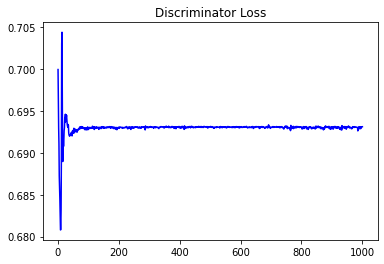

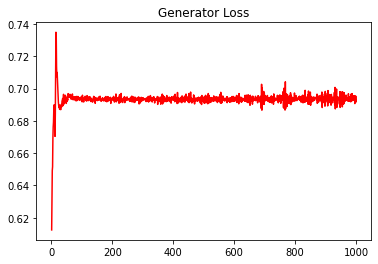

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005575703068656778


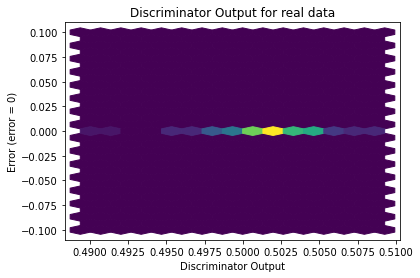

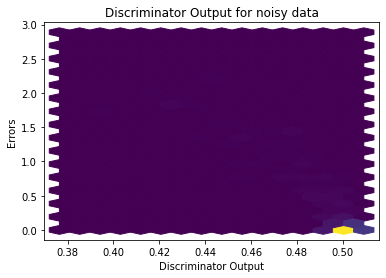

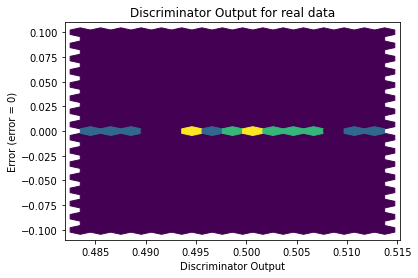

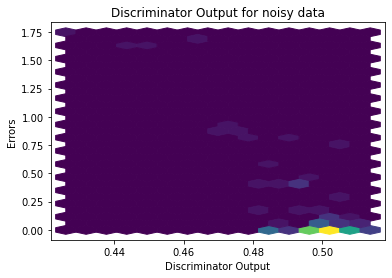

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


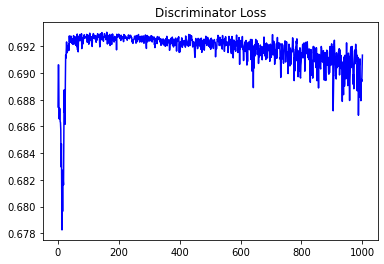

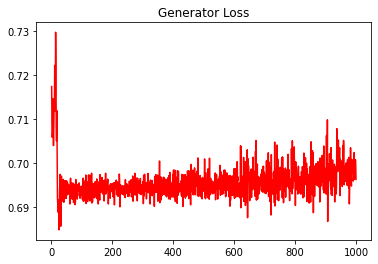

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004201312415279396


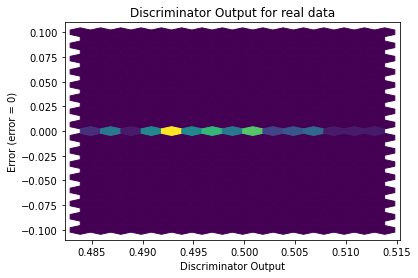

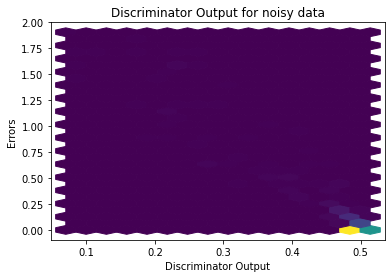

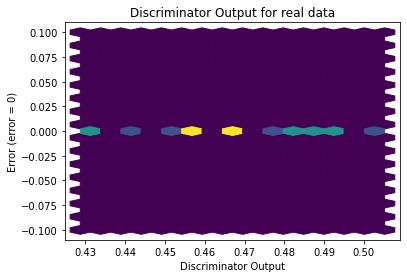

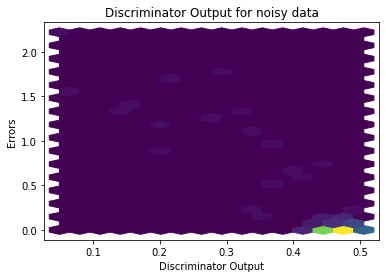

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0972]], requires_grad=True)
